<a href="https://colab.research.google.com/github/Romeela/Bank-Marketing/blob/main/Telecom_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/telco_csv.csv")
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.00,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.00,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.00,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.00,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.00,0.00,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27,3,0,0,1,...,0,0,0,3.00,0.00,29.05,0.00,0.0,1,1
996,1,7,34,0,2,22,5,5,0,1,...,0,0,0,4.65,0.00,25.60,0.00,0.0,0,1
997,3,67,59,0,40,944,5,33,0,1,...,1,1,1,26.75,32.00,54.55,35.75,65.8,1,4
998,3,70,49,0,18,87,2,22,0,1,...,1,1,1,25.60,33.50,0.00,25.25,0.0,0,3


In [ ]:
df.isnull().sum()

region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
retire      0
gender      0
reside      0
tollfree    0
equip       0
callcard    0
wireless    0
multline    0
voice       0
pager       0
internet    0
callid      0
callwait    0
forward     0
confer      0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
ebill       0
custcat     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   int64  
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   int64  
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   int64  
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   int64  
 9   gender    1000 non-null   int64  
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   int64  
 12  equip     1000 non-null   int64  
 13  callcard  1000 non-null   int64  
 14  wireless  1000 non-null   int64  
 15  multline  1000 non-null   int64  
 16  voice     1000 non-null   int64  
 17  pager     1000 non-null   int64  
 18  internet  1000 non-null   int64  
 19  callid    1000 non-null   int64  
 20  callwait  1000 non-null   int64

In [ ]:
df.keys()

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill', 'custcat'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit (df)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(df)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA (n_components= 2)

In [ ]:
pca.fit (scaled_data)

PCA(n_components=2)

In [ ]:
x_pca = pca.transform (scaled_data)

In [ ]:
scaled_data.shape

(1000, 30)

In [ ]:
x_pca.shape

(1000, 2)

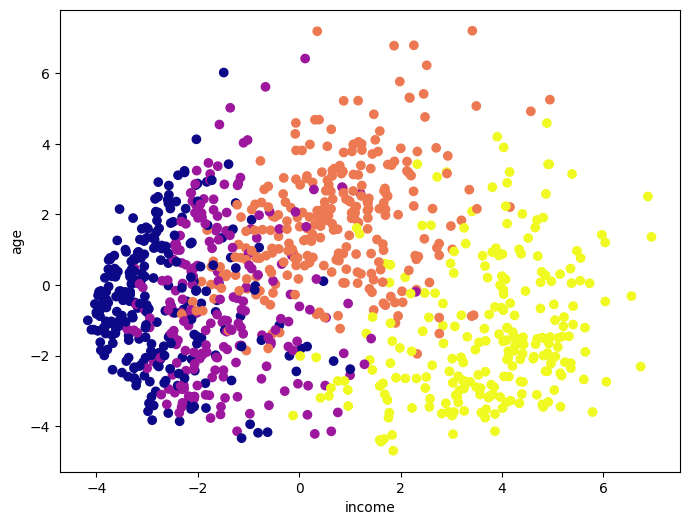

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter (x_pca[:,0],x_pca[:,1],c= df['custcat'], cmap = 'plasma')
plt.xlabel('income')
plt.ylabel('age')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km3= KMeans (n_clusters=3)
km3.fit(df)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
x = df.iloc[:,26:]
x.head()

,cardmon,wiremon,ebill,custcat
0,7.50,0.0,0,1
1,15.25,35.7,0,4
2,30.25,0.0,0,3
3,0.00,0.0,0,1
4,0.00,0.0,0,3


In [ ]:
clusters =[]
wcss =[]
for i in range (2,10):
  km = KMeans (n_clusters=i)
  km.fit(x)
  wcssi=km.inertia_
  clusters.append(i)
  wcss.append(wcssi)
  print(f"for clusters = {i} the wcss/inertia_ is {wcssi}" )


for clusters = 2 the wcss/inertia_ is 255487.08738359762
for clusters = 3 the wcss/inertia_ is 172669.99703117946
for clusters = 4 the wcss/inertia_ is 127924.8072664039
for clusters = 5 the wcss/inertia_ is 95230.0773359063
for clusters = 6 the wcss/inertia_ is 79921.35263110613
for clusters = 7 the wcss/inertia_ is 66062.57995387707
for clusters = 8 the wcss/inertia_ is 53891.15429121874
for clusters = 9 the wcss/inertia_ is 46760.50615748063


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

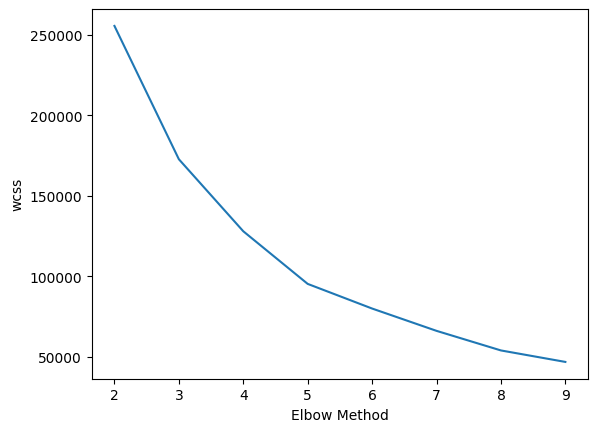

In [ ]:
plt.plot(clusters,wcss)
plt.xlabel("Elbow Method")
plt.ylabel("wcss")
plt.show()

In [ ]:
predicted_cluster3 = km3.predict(df)
predicted_cluster3

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,

In [ ]:
df ["predicted_cluster"] = predicted_cluster3

In [ ]:
df.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat,predicted_cluster
0,2,13,44,1,9,64,4,5,0,0,...,1,0,3.70,0.00,0.0,7.50,0.0,0,1,2
1,3,11,33,1,7,136,5,5,0,0,...,1,1,4.40,20.75,0.0,15.25,35.7,0,4,2
2,3,68,52,1,24,116,1,29,0,1,...,0,1,18.15,18.00,0.0,30.25,0.0,0,3,2
3,2,33,33,0,12,33,2,0,0,1,...,0,0,9.45,0.00,0.0,0.00,0.0,0,1,2
4,2,23,30,1,9,30,1,2,0,0,...,1,1,6.30,0.00,0.0,0.00,0.0,0,3,2


In [ ]:
df ["predicted_cluster"].value_counts()

2    879
0    112
1      9
Name: predicted_cluster, dtype: int64

In [ ]:
df ["predicted_cluster"].mean()

1.767

In [ ]:
df.groupby(["predicted_cluster"]).mean().T

predicted_cluster,0,1,2
region,2.026786,2.111111,2.020478
tenure,47.892857,59.888889,33.700796
age,52.491071,58.444444,40.135381
marital,0.500000,0.222222,0.497156
address,16.785714,22.555556,10.771331
income,228.946429,873.666667,50.091013
ed,2.866071,3.444444,2.638225
employ,24.517857,32.666667,9.040956
retire,0.017857,0.000000,0.051195
gender,0.526786,0.666667,0.514221


In [ ]:
km3.inertia_

4576995.408827539